In [62]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from utils import *

# Weekly activity
1. Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use _"lena.jfif"_ as the input image.
    - Use external libraries `imutils`.  
    - Modify the transformation matrix.





In [6]:
import cv2 as cv
import numpy as np
from utils import display_images  # Assuming the display_images function is in utils.py

# Load the image
img = cv.imread('images/lena.jfif')
rows, cols = img.shape[:2]

center = (cols // 2, rows // 2)

angle = 45
M = cv.getRotationMatrix2D(center, angle, 1.0)

cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])

new_cols = int((rows * sin) + (cols * cos))
new_rows = int((rows * cos) + (cols * sin))

M[0, 2] += (new_cols / 2) - center[0]
M[1, 2] += (new_rows / 2) - center[1]

dst = cv.warpAffine(img, M, (new_cols, new_rows))

display_image("rotate 45 degree", dst)

In [15]:
import imutils

# Load the image
img = cv.imread("images\lena.jfif")

# Method 1: Using imutils.rotate_bound
rotated_img_imutils = imutils.rotate_bound(img, -45)

display_image("rotated image", rotated_img_imutils)

2. Use the images with titles: _"flower.jfif"_ and _"native-bee.png"_. I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are `cv.bitwise_and()`, `cv.bitwise_or()` and `cv.bitwise_not()`. You need to use `cv.threshold` function to segment the flower. Please refer to [online documentation](https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html) for more info. The result should resemble the following:  
![bee and flowers](img_embed/activity3.PNG "bee_flower")

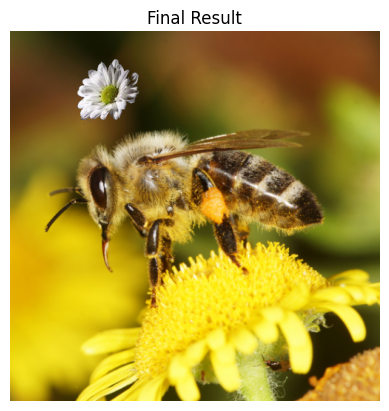

In [63]:

# Read the images
flower = cv.imread("images/flower.jfif", cv.IMREAD_UNCHANGED)
bee = cv.imread("images/native-bee.png", cv.IMREAD_UNCHANGED)

flower_gray = cv.cvtColor(flower, cv.COLOR_BGR2GRAY)

# Automatic find the best thershold * not the best result
# blur = cv.GaussianBlur(flower_gray,(5,5),0)
# _, mask = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

#Best result
_, mask = cv.threshold(flower_gray, 70, 255, cv.THRESH_BINARY)

# Create an inverted mask
mask_inv = cv.bitwise_not(mask)

# Define the coordinates where you want to place the flower image on the bee image
top_left_x = 0  # X coordinate of the top-left corner
top_left_y = 0  # Y coordinate of the top-left corner

# Get the height and width of the flower image
flower_height, flower_width = flower.shape[:2]

# Get the region of interest (ROI) on the bee image where the flower will be placed
roi = bee[top_left_y:top_left_y + flower_height, top_left_x:top_left_x + flower_width].copy()

# Apply the mask to the flower and background regions
flower_fg = cv.bitwise_and(flower[..., :3], flower[..., :3], mask=mask)
bee_bg = cv.bitwise_and(roi[..., :3], roi[..., :3], mask=mask_inv)

# Ensure both images have the same number of channels (if not already ensured)
if bee_bg.shape[2] != flower_fg.shape[2]:
    bee_bg = cv.cvtColor(bee_bg, cv.COLOR_BGR2BGRA)

# Combine the flower and bee regions
result_roi = cv.add(bee_bg, flower_fg)
result_roi_bgra = cv.cvtColor(result_roi, cv.COLOR_BGR2BGRA)
# Copy the combined region back into the original bee image
bee[top_left_y:top_left_y + flower_height, top_left_x:top_left_x + flower_width] = result_roi_bgra

# Display each step's output
display_image("Final result", bee)
plt.imshow(cv.cvtColor(bee, cv.COLOR_BGR2RGB))
plt.title("Final Result")
plt.axis('off')
plt.show()

3. Write a function that randomly crop the central region of an image. The method signature should be as shown in the following:
```
random_center_crop(image, min_crop_ratio, max_crop_ratio)
```

In [60]:

def random_center_crop(image, min_crop_ratio, max_crop_ratio):
    """
    Randomly crop the central region of an image.

    Parameters:
    - image: Input image (numpy array).
    - min_crop_ratio: Minimum ratio for cropping (0.0 to 1.0).
    - max_crop_ratio: Maximum ratio for cropping (0.0 to 1.0).

    Returns:
    - Cropped image (numpy array).
    """
    if min_crop_ratio < 0.0 or min_crop_ratio > 1.0:
        raise ValueError("min_crop_ratio should be between 0.0 and 1.0")
    if max_crop_ratio < 0.0 or max_crop_ratio > 1.0:
        raise ValueError("max_crop_ratio should be between 0.0 and 1.0")
    if min_crop_ratio > max_crop_ratio:
        raise ValueError("min_crop_ratio should not be greater than max_crop_ratio")

    # Get image dimensions
    height, width = image.shape[:2]

    # Calculate crop sizes based on ratios
    min_crop_size = int(min(height, width) * min_crop_ratio)
    max_crop_size = int(min(height, width) * max_crop_ratio)

    # Randomly select crop size
    crop_size = np.random.randint(min_crop_size, max_crop_size + 1)

    # Calculate crop region
    start_x = max(0, (width - crop_size) // 2)
    start_y = max(0, (height - crop_size) // 2)
    end_x = start_x + crop_size
    end_y = start_y + crop_size

    # Perform crop
    cropped_image = image[start_y:end_y, start_x:end_x]

    return cropped_image

img1 = random_center_crop(cv.imread("images\lena.jfif"), 0.1, 0.5)
display_image("result",img1)


4. Aside from Gaussian noise, name another common type of noise. Write the code to demonstrate how the noise can be included in an image.

In [61]:
#Another noise would be salt and pepper noise

def add_salt_and_pepper_noise(image, salt_ratio=0.01, pepper_ratio=0.01):
    """
    Add salt and pepper noise to an image.

    Parameters:
    - image: Input image (numpy array).
    - salt_ratio: Ratio of pixels to be replaced with salt noise.
    - pepper_ratio: Ratio of pixels to be replaced with pepper noise.

    Returns:
    - Noisy image (numpy array).
    """
    noisy_image = np.copy(image)

    # Add salt noise
    num_salt = np.ceil(image.size * salt_ratio)
    coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
    noisy_image[coords[0], coords[1], :] = 255

    # Add pepper noise
    num_pepper = np.ceil(image.size * pepper_ratio)
    coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
    noisy_image[coords[0], coords[1], :] = 0

    return noisy_image

image = cv.imread('images\lena.jfif')
noisy_image = add_salt_and_pepper_noise(image, salt_ratio=0.01, pepper_ratio=0.01)

cv.imshow('Salt and Pepper Noisy Image', noisy_image)
cv.waitKey(0)
cv.destroyAllWindows()